In [4]:
using CairoMakie
using Unitful
using Colors
import PhysicalConstants.CODATA2018: h, k_B, c_0

In [5]:
# Set some plot defaults
custom_theme = Theme(
    Axis = (
        xgridvisible = false,  # Set grid visibility to false
        ygridvisible = false,
    ),
)
Makie.set_theme!(custom_theme)

In [3]:
i_units = u"kW / (m^2 * nm * sr)"

function blackbody_λ(λ, temp) 
    radiation = 2h * c_0^2 * λ^-5 / (exp(h * c_0 / k_B / (λ * temp)) - 1)
    return radiation |> i_units
end

if_units = u"nW / (m^2 * Hz * sr)"

function blackbody_ν(ν, temp) 
    radiation = 2h * ν^3 / c_0^2 / (exp(h * ν / (k_B * temp)) - 1)
    return radiation |> if_units
end

blackbody_ν (generic function with 1 method)

In [10]:
blackbody_λ(500u"nm", 5000u"K")

12.107190590398112 kW nm⁻¹ m⁻² sr⁻¹

In [12]:
blackbody_λ.(500u"nm", [5, 7]u"kK")

2-element Vector{Quantity{Float64, 𝐌 𝐋⁻¹ 𝐓⁻³, Unitful.FreeUnits{(nm⁻¹, m⁻², sr⁻¹, kW), 𝐌 𝐋⁻¹ 𝐓⁻³, nothing}}}:
 12.107190590398112 kW nm⁻¹ m⁻² sr⁻¹
 63.52763846582657 kW nm⁻¹ m⁻² sr⁻¹

In [16]:
wave = logrange(100, 10_000, 200)u"nm"
temp = range(5000, 8000, 15)u"K"
radiation = zeros(typeof(1. * i_units), length(wave), length(temp))

for j in 1:length(wave), i in 1:length(temp)
    radiation[j, i] = blackbody_λ(wave[j], temp[i])
end

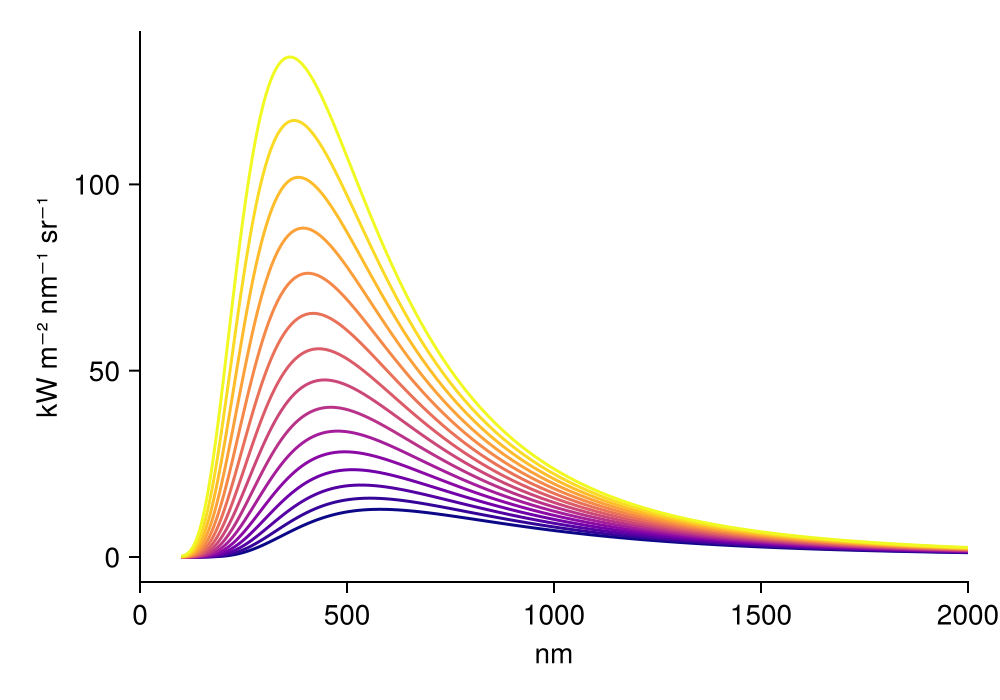

In [25]:
fig = Figure(size=(500, 350))
ax = Axis(fig[1,1], xlabel="nm", ylabel="kW m⁻² nm⁻¹ sr⁻¹")
cmap = cgrad(:plasma, length(temp); categorical=true)

for i in 1:length(temp)
    lines!(ax, ustrip(wave), ustrip(radiation[:, i]); color=cmap[i])
end
xlims!(ax, 0, 2000)
hidespines!(ax, :t, :r)
fig

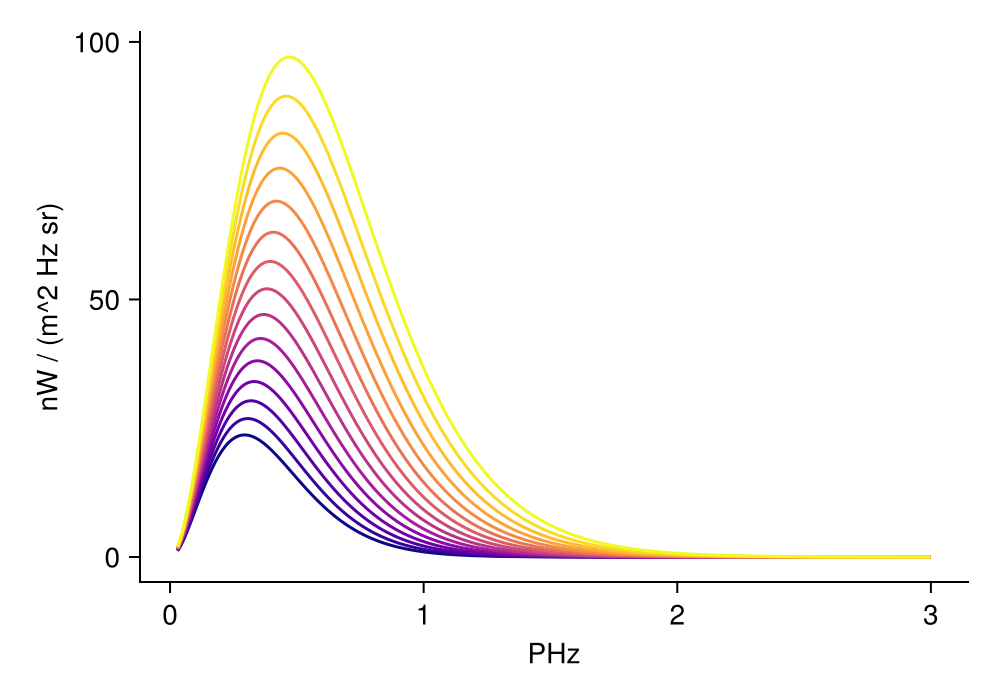

In [29]:
radiation_ν = zeros(typeof(1. * if_units), length(wave), length(temp))
freq = (c_0 ./ wave) .|> u"PHz"

for j in 1:length(freq), i in 1:length(temp)
    radiation_ν[j,i] = blackbody_ν(freq[j], temp[i])
end

fig = Figure(size=(500, 350))
ax = Axis(fig[1,1], xlabel="PHz", ylabel="nW / (m^2 Hz sr)")

for i in 1:length(temp)
    lines!(ax, ustrip(freq), ustrip(radiation_ν[:, i]); color=cmap[i])
end
hidespines!(ax, :t, :r)
fig